#### Matthew Przybyla

### Table of Contents
1. [Exercise A](#Exercise-A)
3. [Exericse B](#Exercise-B)
5. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
6. [Feature Engineering](#Feature-Engineering)
7. [Time Series Model](#Time-Series-Model)
8. [Results](#Results)
9. [Discussion](#Discussion)
10. [Exercise C](#Exercise-C)

# Exercise A

I used SQLite for my database and the three sepearte csv's were the three different tables

Import the three csv files into a SQL database and answer the following questions using SQL. You can create the database however you’d like, but please use SQL to solve these questions.
1. How many orders were completed in 2018? (Note: We operate in US/Eastern timezone)
2. How many orders were completed in 2018 containing at least 10 units?
3. How many customers have ever purchased a medium sized sweater with a discount?
4. How profitable was our most profitable month? (Profit = Revenue - Cost)

In [ ]:
answer_1 = pd.read_sql("""
          select count(order_number)
          from orders 
          where ordered_at_utc > '2018-01-01'
          and ordered_at_utc < '2019-01-01'
            """, con = creds)

# 35,252 orders
# would add hour/zone, etc

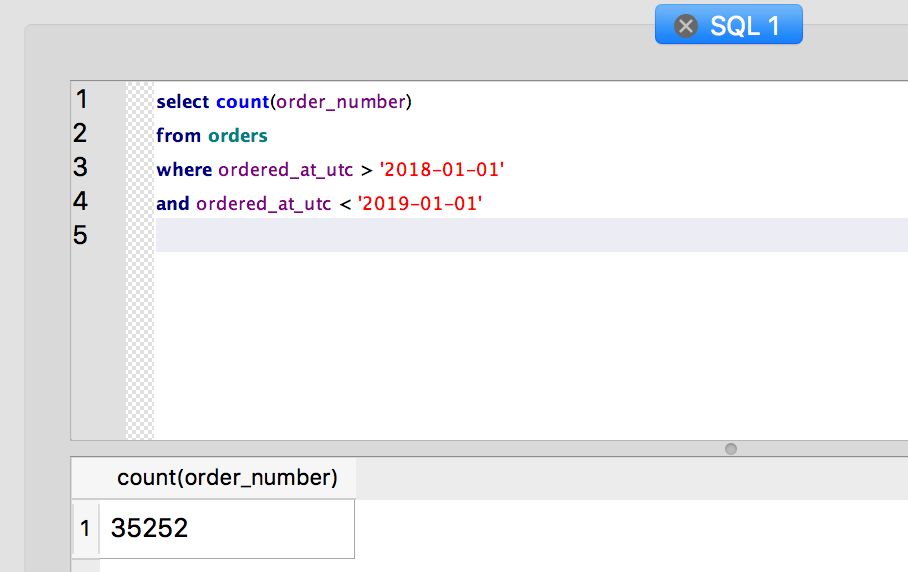

In [108]:
from IPython.display import Image
Image("/Users/MatthewPrzybyla/Desktop/Screen Shot 2020-06-11 at 8.01.32 PM.png")

In [ ]:
answer_2 = pd.read_sql("""
            select count(orders.order_number)
            from orders  
            left join line_items on line_items.order_number = orders.order_number
            where ordered_at_utc > '2018-01-01'
            and ordered_at_utc < '2019-01-01'
            and line_items.units_sold > 10""", con = creds)

# 17,066 orders

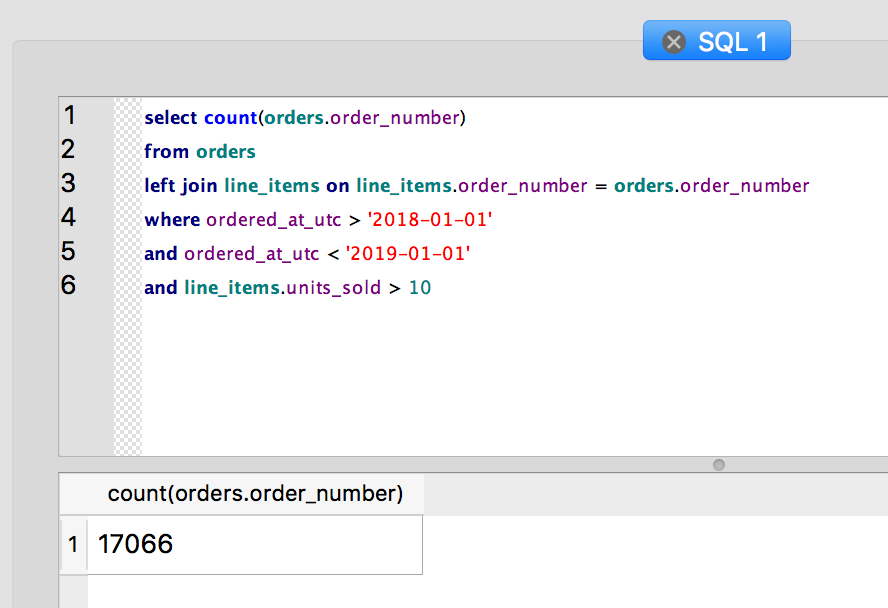

In [109]:
Image("/Users/MatthewPrzybyla/Desktop/Screen Shot 2020-06-11 at 8.08.01 PM.png")

In [ ]:
answer_3 = pd.read_sql("""
            select count(orders.customer_uuid)
            from orders  
            left join line_items on line_items.order_number = orders.order_number
            left join products on products.product_id = line_items.product_id
            where products.description like '%sweater%'
            and orders.discount  > 0""", con = creds)
# 6,648 customers

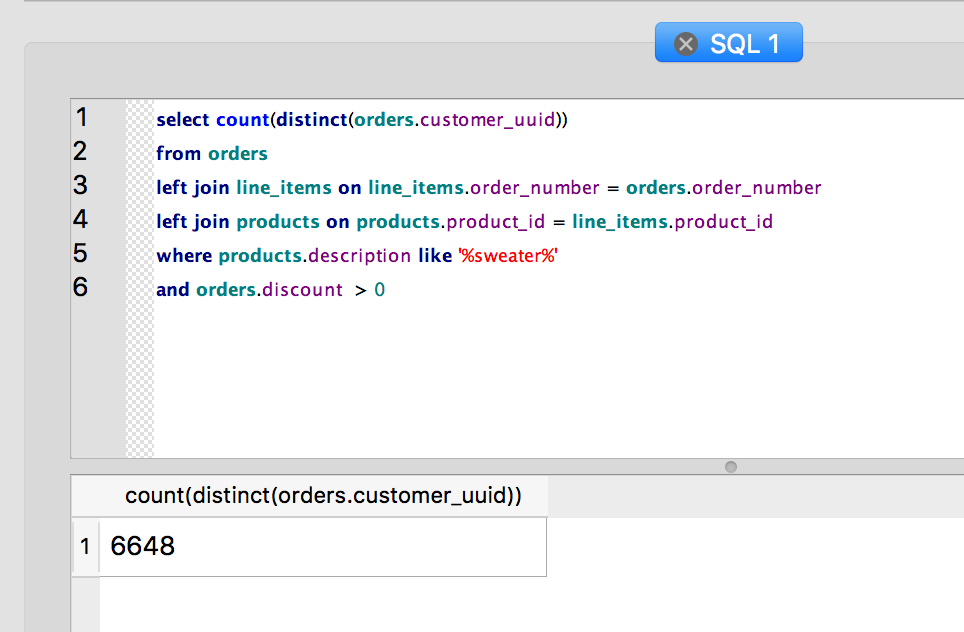

In [111]:
Image("/Users/MatthewPrzybyla/Desktop/Screen Shot 2020-06-11 at 8.14.47 PM.png")

In [ ]:
answer_4 = pd.read_sql("""select 
            sum(products.selling_price - products.supplier_cost) as revenue, 
            strftime("%m-%Y", orders.ordered_at_utc) as 'month-year' 
            from orders  
            left join line_items on line_items.order_number = orders.order_number
            left join products on products.product_id = line_items.product_id
            group by strftime("%m-%Y", orders.ordered_at_utc)
            order by revenue desc)""", con = creds)

# 2019 - 10 at $59, 029.12

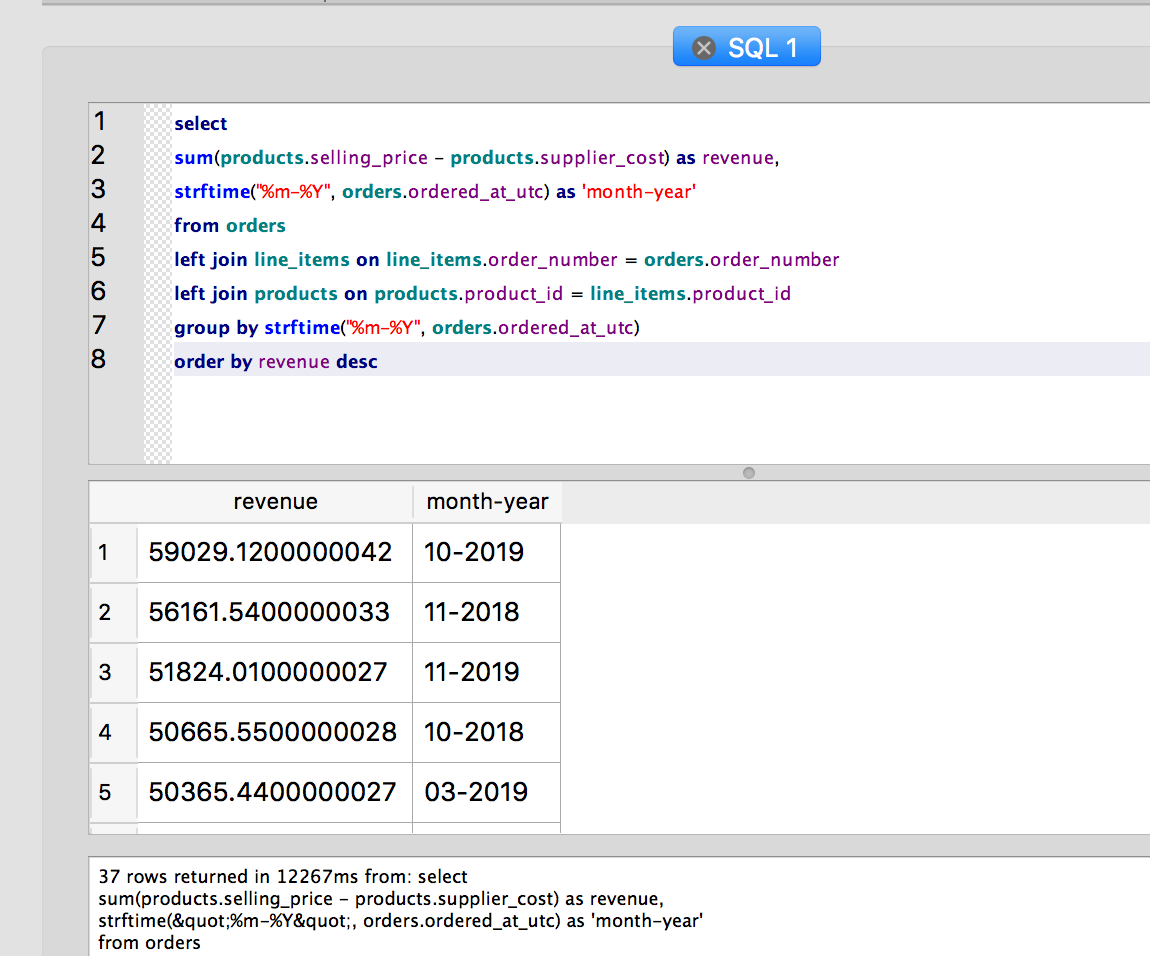

In [112]:
Image("/Users/MatthewPrzybyla/Desktop/Screen Shot 2020-06-11 at 8.18.37 PM.png")

### my database is locked so attached screen shots above


In [92]:
# my database is locked so attached screen shots above
import sqlite3
import pandas as pd

# Create the connection
cnx = sqlite3.connect('/Users/MatthewPrzybyla/Downloads/Jiffyshirts_DS_Exercise 2/jiffy_database.db')

# create the dataframe from a query
# df = pd.read_sql_query("SELECT * FROM orders LIMIT 5", cnx)

# Exercise B

## Exploratory Data Analysis

In [3]:
# read in csv into a dataframe

product = pd.read_csv('/Users/MatthewPrzybyla/Downloads/Jiffyshirts_DS_Exercise/products.csv')

orders = pd.read_csv('/Users/MatthewPrzybyla/Downloads/Jiffyshirts_DS_Exercise/orders.csv',
                parse_dates=["ordered_at_utc"],
                infer_datetime_format=True)  
                     
line_items = pd.read_csv('/Users/MatthewPrzybyla/Downloads/Jiffyshirts_DS_Exercise/line_items.csv')

In [4]:
# check for missing values and calculate the percent
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [5]:
product.head()

,product_id,model_number,description,size,color,selling_price,supplier_cost
0,383372,T5000,Cotton T-shirt,S,WHITE,4.0000,1.6400
1,383379,T5000,Cotton T-shirt,M,WHITE,3.9500,1.5200
2,383386,T5000,Cotton T-shirt,L,WHITE,3.7400,1.5500
3,383393,T5000,Cotton T-shirt,XL,WHITE,3.9800,1.6100
4,383400,T5000,Cotton T-shirt,2XL,WHITE,6.5600,3.1400


In [6]:
product.shape

(70, 7)

In [7]:
missing_values_table(product)

Your selected dataframe has 7 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [8]:
orders.head()

,order_number,ordered_at_utc,customer_uuid,discount
0,148320207,2018-08-10 18:36:00,7407832334954,0.0200
1,158388486,2018-09-14 18:04:00,4792179702802,0.0000
2,319826542,2019-11-05 17:19:00,6361892924206,0.0200
3,112353536,2018-03-01 15:15:00,5355738154163,0.0000
4,210921837,2019-03-05 19:40:00,4597141608241,0.0000


In [9]:
missing_values_table(orders)

Your selected dataframe has 4 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [10]:
orders.shape

(100090, 4)

In [11]:
line_items.head()

,line_item_number,order_number,units_sold,product_id
0,47063766,43614957,10.0000,384359
1,199432388,160115380,6.0000,383379
2,110646313,78767308,2.0000,1609933
3,73888109,70131395,4.0000,383386
4,72368080,68989774,9.0000,384240


In [12]:
line_items.shape

(263459, 4)

In [13]:
missing_values_table(line_items)

Your selected dataframe has 4 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [14]:
merge_1 = orders.merge(line_items, on='order_number')

In [15]:
df = merge_1.merge(product, on='product_id')

In [16]:
df.head()

,order_number,ordered_at_utc,customer_uuid,discount,line_item_number,units_sold,product_id,model_number,description,size,color,selling_price,supplier_cost
0,148320207,2018-08-10 18:36:00,7407832334954,0.0200,181686513,7.0000,569789,T1850,Cotton Sweater,XL,BLACK,22.0100,8.1600
1,152403312,2018-08-29 18:13:00,4083312638271,0.0600,188522363,9.0000,569789,T1850,Cotton Sweater,XL,BLACK,22.0100,8.1600
2,181312465,2018-11-20 07:42:00,4584988375558,0.0600,226444646,9.0000,569789,T1850,Cotton Sweater,XL,BLACK,22.0100,8.1600
3,77671616,2017-10-06 21:50:00,4183540940024,0.0800,91741819,9.0000,569789,T1850,Cotton Sweater,XL,BLACK,22.0100,8.1600
4,152650897,2018-09-04 01:16:00,918204649305,0.1000,191205274,6.0000,569789,T1850,Cotton Sweater,XL,BLACK,22.0100,8.1600


In [17]:
df['revenue'] = (df['units_sold'] * (df['selling_price'] - df['supplier_cost']))

In [18]:
df.shape

(262290, 14)

In [19]:
df.sort_values(by = 'order_number' )

,order_number,ordered_at_utc,customer_uuid,discount,line_item_number,units_sold,product_id,model_number,description,size,color,selling_price,supplier_cost,revenue
218800,1065294,2017-04-03 15:24:00,1420487929853,0.0000,53279913,2.0000,384324,T5000,Cotton T-shirt,2XL,ROYAL,8.5400,3.4000,10.2800
182565,1065294,2017-04-03 15:24:00,1420487929853,0.0000,53279626,4.0000,384219,T5000,Cotton T-shirt,M,BLACK,5.2800,1.8400,13.7600
259727,1687370,2016-12-19 23:01:00,177085532455,0.0000,38445709,9.0000,569047,T1850,Cotton Sweater,M,WHITE,19.7400,7.7000,108.3600
67240,1965258,2017-02-02 22:08:00,5903741242445,0.0000,43289121,12.0000,383379,T5000,Cotton T-shirt,M,WHITE,3.9500,1.5200,29.1600
53898,1965258,2017-02-02 22:08:00,5903741242445,0.0000,43289128,4.0000,383386,T5000,Cotton T-shirt,L,WHITE,3.7400,1.5500,8.7600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103938,341646470,2019-12-13 02:38:00,3563412659411,0.0000,423759890,3.0000,569796,T1850,Cotton Sweater,2XL,BLACK,25.4100,10.2700,45.4200
233303,341652320,2019-12-13 02:47:00,6915351565376,0.0000,423765035,6.0000,1609884,N1500,Ladies Tank,L,BLACK,4.9100,1.9500,17.7600
174986,341663513,2019-12-13 03:16:00,8028319164857,0.0000,423779497,6.0000,384219,T5000,Cotton T-shirt,M,BLACK,5.2800,1.8400,20.6400
5495,341669701,2019-12-13 04:03:00,2692762282314,0.0000,423801722,7.0000,569775,T1850,Cotton Sweater,M,BLACK,21.8700,8.0400,96.8100


In [20]:
# create a new field that is datetime
df['date_time'] = pd.to_datetime(df['ordered_at_utc'])

In [21]:
# check the types of column
df.dtypes

order_number                 int64
ordered_at_utc      datetime64[ns]
customer_uuid                int64
discount                   float64
line_item_number             int64
units_sold                 float64
product_id                   int64
model_number                object
description                 object
size                        object
color                       object
selling_price              float64
supplier_cost              float64
revenue                    float64
date_time           datetime64[ns]
dtype: object

In [22]:
print('number of rows:', df.shape[0], 
      ', number of possible features:', df.shape[1])

number of rows: 262290 , number of possible features: 15


In [23]:
print('start date:', df['date_time'].min())
print('end date:', df['date_time'].max())

start date: 2016-12-13 00:20:00
end date: 2019-12-13 06:13:00


In [25]:
# clean the dataframe so that it is easier to work with
# keep some columns if used for future analysis
df['date_time_col'] = df['date_time']
df = df.set_index(['date_time'])
df.head()

,order_number,ordered_at_utc,customer_uuid,discount,line_item_number,units_sold,product_id,model_number,description,size,color,selling_price,supplier_cost,revenue,date_time_col
date_time,,,,,,,,,,,,,,,
2018-08-10 18:36:00,148320207,2018-08-10 18:36:00,7407832334954,0.0200,181686513,7.0000,569789,T1850,Cotton Sweater,XL,BLACK,22.0100,8.1600,96.9500,2018-08-10 18:36:00
2018-08-29 18:13:00,152403312,2018-08-29 18:13:00,4083312638271,0.0600,188522363,9.0000,569789,T1850,Cotton Sweater,XL,BLACK,22.0100,8.1600,124.6500,2018-08-29 18:13:00
2018-11-20 07:42:00,181312465,2018-11-20 07:42:00,4584988375558,0.0600,226444646,9.0000,569789,T1850,Cotton Sweater,XL,BLACK,22.0100,8.1600,124.6500,2018-11-20 07:42:00
2017-10-06 21:50:00,77671616,2017-10-06 21:50:00,4183540940024,0.0800,91741819,9.0000,569789,T1850,Cotton Sweater,XL,BLACK,22.0100,8.1600,124.6500,2017-10-06 21:50:00
2018-09-04 01:16:00,152650897,2018-09-04 01:16:00,918204649305,0.1000,191205274,6.0000,569789,T1850,Cotton Sweater,XL,BLACK,22.0100,8.1600,83.1000,2018-09-04 01:16:00


In [26]:
# size of the data
df.shape

(262290, 15)

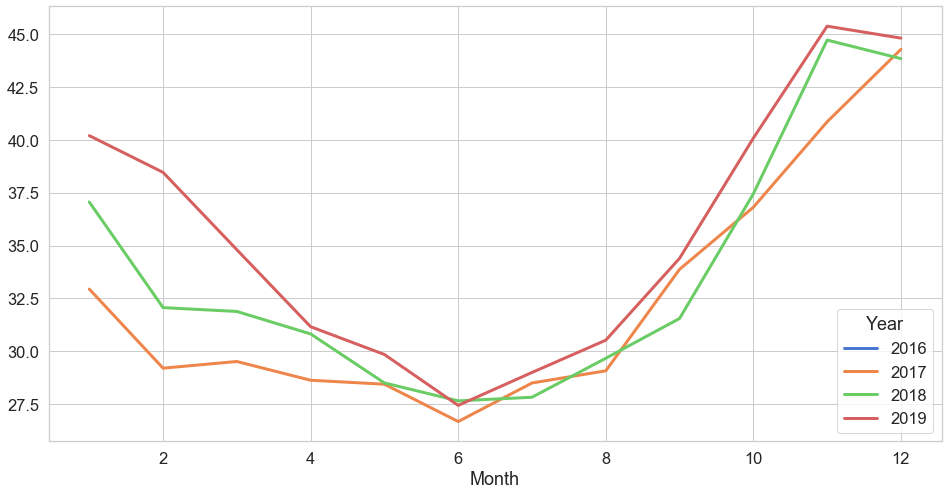

In [27]:
# develop new time features to analyze
 
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
season = df
season['Date'] = df['date_time_col']
season['Year'] = df['date_time_col'].dt.year
season['Month'] = df['date_time_col'].dt.month
season['Week'] = df['date_time_col'].dt.week
season['Day'] = df['date_time_col'].dt.day
season['Hour'] = df['date_time_col'].dt.hour
spivot = pd.pivot_table(season, index='Month', columns = 'Year', values = 'revenue', aggfunc=np.mean)
spivot.plot(figsize=(16,8), linewidth=3)
plt.show()

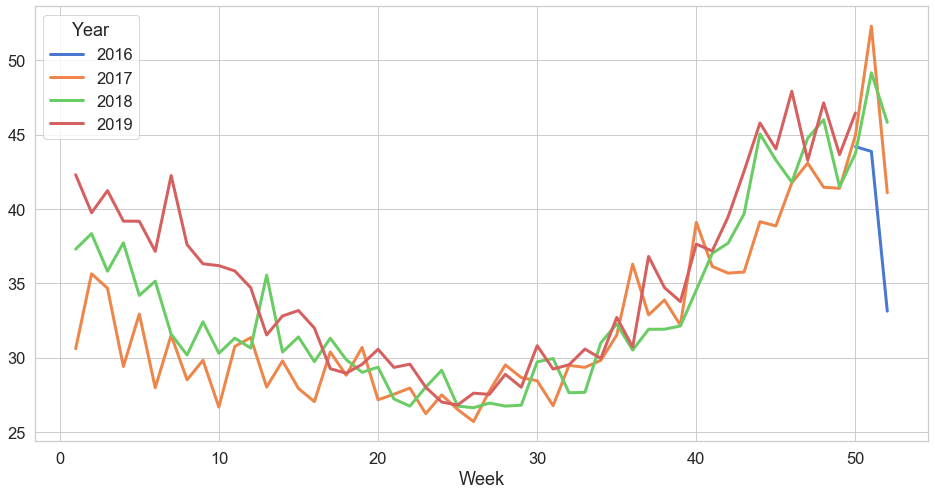

In [28]:
# amount of orders by week
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
spivot = pd.pivot_table(season, index='Week', columns = 'Year', values = 'revenue', aggfunc=np.mean)
spivot.plot(figsize=(16,8), linewidth=3)
plt.show()

In [29]:
# order count by months well distributed - ish - there's a dip
df.groupby('Month')[['revenue']].mean()

,revenue
Month,
1,38.0204
2,35.0680
3,32.8653
4,30.5399
5,29.1059
6,27.3543
7,28.4844
8,29.8801
9,33.2531


In [30]:
# order count by weeks well distributed
df.groupby('Week')[['revenue']].mean()

,revenue
Week,
1,38.2327
2,38.6071
3,38.6322
4,36.9492
5,36.5673
6,35.0624
7,37.7928
8,33.6278
9,33.9552


In [31]:
# mean of the year days
df.groupby('Day')[['revenue']].mean()

,revenue
Day,
1,34.2600
2,33.8611
3,32.9573
4,34.4958
5,33.8202
6,33.4552
7,34.0639
8,32.8364
9,32.1479


Text(0, 0.5, 'Revenue')

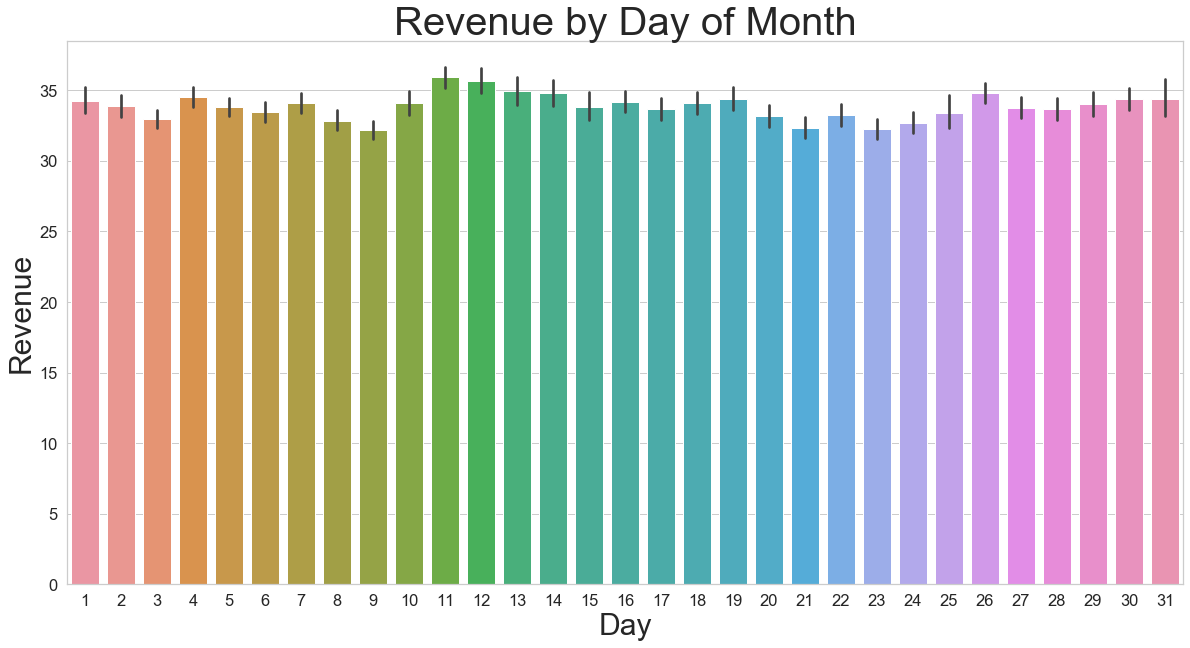

In [32]:
# Day of Month
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
plt.figure(figsize=(20,10))
ax = sns.barplot(x='Day', y="revenue", data=df)
ax.axes.set_title("Revenue by Day of Month",fontsize=40)
ax.set_xlabel("Day",fontsize=30)
ax.set_ylabel("Revenue",fontsize=30)

## Feature Engineering

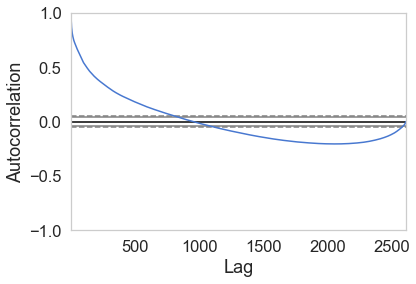

In [33]:
# will need to look into this more
import matplotlib.pyplot as plt
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
brtypes = df.groupby('revenue')['revenue','date_time_col'].\
    mean().dropna()
pd.plotting.autocorrelation_plot(brtypes);
plt.show()

In [34]:
df.columns

Index(['order_number', 'ordered_at_utc', 'customer_uuid', 'discount',
       'line_item_number', 'units_sold', 'product_id', 'model_number',
       'description', 'size', 'color', 'selling_price', 'supplier_cost',
       'revenue', 'date_time_col', 'Date', 'Year', 'Month', 'Week', 'Day',
       'Hour'],
      dtype='object')

In [35]:
# look at the correlated features
corr = df[['order_number', 'customer_uuid', 'discount', 'line_item_number','units_sold', 
           'model_number','selling_price', 'supplier_cost','revenue',
          ]].corr()

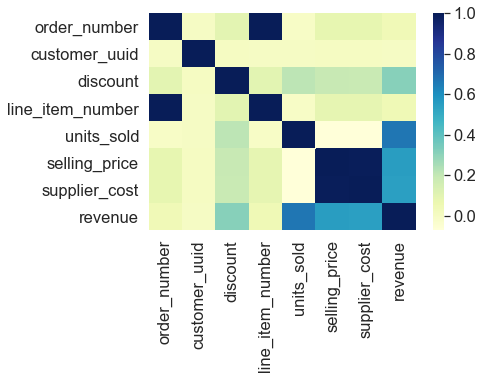

In [36]:
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="YlGnBu")

In [37]:
# test for normaility
diagnostic = df.groupby('date_time_col')['date_time_col','revenue'].mean().dropna()

In [38]:
# # normaility looks good
# # need to look into this more, spent more time on LSTM/TensorFlow
# sns.set(style='whitegrid', palette='muted', font_scale=1.5)
# mod = sm.tsa.statespace.SARIMAX(diagnostic,
#                                     order = (2, 0, 4),
#                                     seasonal_order = (3, 1, 2, 12),
#                                     enforce_stationarity = False,
#                                     enforce_invertibility = False)
# results = mod.fit()
# results.plot_diagnostics(figsize=(15,12))
# plt.show()

In [39]:
df2 = df[['order_number','revenue']]

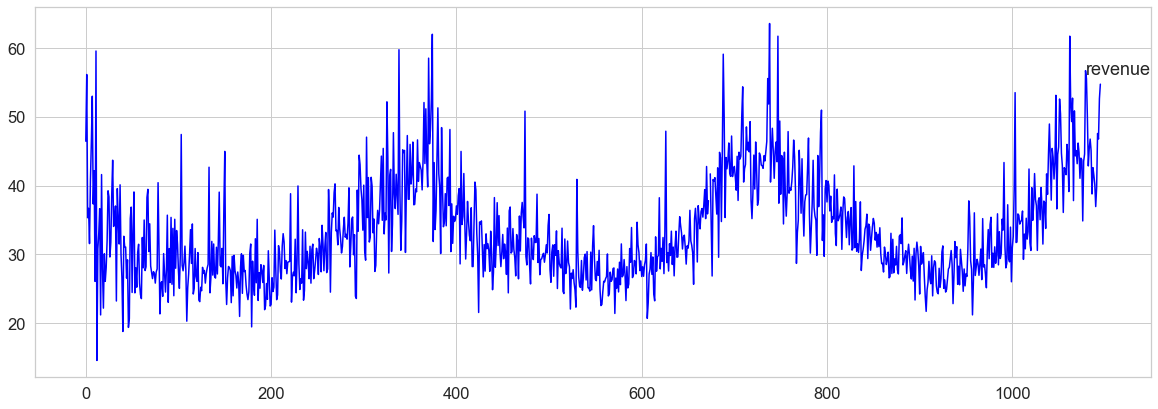

In [40]:
# specific autocorrelation
i = 1
# plot each column
plt.figure(figsize=(20, 15))
for counter in range(1,len(df2.columns)):
    plt.subplot(len(df2.columns), 1, i)
    plt.plot(df2.resample('D').mean().values[:, counter], color = 'blue')
    plt.title(df2.columns[counter], y=0.8, loc='right')
    i = i+1
plt.show()

## Time Series Model

In [41]:
df.columns

Index(['order_number', 'ordered_at_utc', 'customer_uuid', 'discount',
       'line_item_number', 'units_sold', 'product_id', 'model_number',
       'description', 'size', 'color', 'selling_price', 'supplier_cost',
       'revenue', 'date_time_col', 'Date', 'Year', 'Month', 'Week', 'Day',
       'Hour'],
      dtype='object')

In [86]:
# convert series to supervised learning
def series_to_supervised(data, n_in=2, n_out=2, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
dataset = df

dataset = dataset[['revenue', 'model_number']]
                   #'units_sold', 'product_id', 'model_number']]

values = dataset.values
# integer encode for categorical variable
encoder = LabelEncoder()
values[:,1] = encoder.fit_transform(values[:,1])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[3]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var1(t)
1     0.0340     0.5000   0.0439
2     0.0439     0.5000   0.0439
3     0.0439     0.5000   0.0439
4     0.0439     0.5000   0.0290
5     0.0290     0.5000   0.0241


In [87]:
# split into train and test sets
values = reframed.values
train = values[:200000, :]
test = values[200000:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(200000, 1, 2) (200000,) (62289, 1, 2) (62289,)


In [88]:
## design network
look_back = 6
num_features = 1
model = Sequential()
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=10, batch_size=128, validation_data=(test_X, test_y), verbose=2, shuffle=True)

Train on 200000 samples, validate on 62289 samples
Epoch 1/10
 - 12s - loss: 0.0067 - val_loss: 0.0069
Epoch 2/10
 - 11s - loss: 0.0062 - val_loss: 0.0062
Epoch 3/10
 - 10s - loss: 0.0060 - val_loss: 0.0057
Epoch 4/10
 - 11s - loss: 0.0059 - val_loss: 0.0056
Epoch 5/10
 - 10s - loss: 0.0059 - val_loss: 0.0057
Epoch 6/10
 - 11s - loss: 0.0059 - val_loss: 0.0057
Epoch 7/10
 - 11s - loss: 0.0059 - val_loss: 0.0058
Epoch 8/10
 - 10s - loss: 0.0059 - val_loss: 0.0056
Epoch 9/10
 - 11s - loss: 0.0059 - val_loss: 0.0057
Epoch 10/10
 - 10s - loss: 0.0059 - val_loss: 0.0056


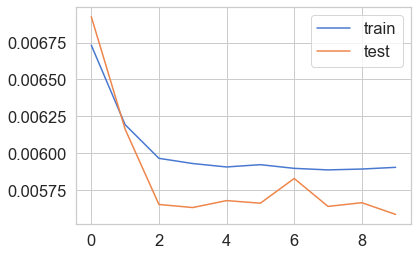

In [89]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## Results

In [90]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
# this RMSE was much lower when I did not have category involved
print('Test RMSE: %.3f' % rmse)

Test RMSE: 27.314


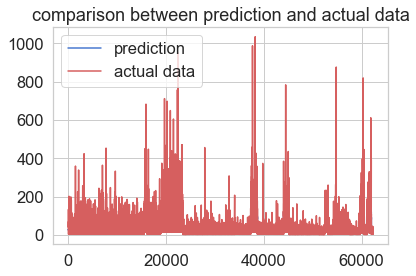

In [93]:
# plot the prediction with actual data
plt.plot(inv_yhat, label = "prediction",c = "b")
plt.plot(inv_y, label = "actual data",c="r")
plt.title("comparison between prediction and actual data")
plt.legend()

In [94]:
# compile the results with actual, predicted, and the difference
predict_df = pd.DataFrame(inv_yhat)
actual_df = pd.DataFrame(inv_y)
predict_df = predict_df.reset_index()
actual_df = actual_df.reset_index()
merged_df = actual_df.merge(predict_df, on = 'index')
merged_df.rename(columns={ merged_df.columns[1]: "actual" }, 
                 inplace = True)
merged_df.rename(columns={ merged_df.columns[2]: "predicted" }, 
                 inplace = True)
merged_df.actual = merged_df.actual.shift(1)
merged_df = merged_df.drop(merged_df.index[0])

merged_df['difference'] = merged_df['actual'] - merged_df['predicted']

In [100]:
# lets look at anomalies/bad predictions
def error_highlighter(val):
    """
    see if any values of difference fall between +- 20 (arbitrary metric, 
    if production I would maybe say 10 orders off/std)
    """
    color = 'red' if val < -20 and val < -20 else 'black'
    return 'color: %s' % color
 
merged_df[['actual','predicted', 'difference']].head(20).style.applymap(error_highlighter)

,actual,predicted,difference
1,41.040001,26.718460,14.321541
2,13.680001,25.456135,-11.776134
3,10.260000,25.295572,-15.035572
4,30.780001,26.249680,4.530321
5,37.619999,26.562815,11.057184
6,20.520000,25.775377,-5.255377
7,34.200001,26.406553,7.793447
8,17.100000,25.616066,-8.516066
9,133.380005,30.691854,102.688148
10,20.520000,25.775377,-5.255377


In [96]:
print('Overall Accuracy:', merged_df['predicted'].sum()/merged_df['actual'].sum())

Overall Accuracy: 0.98654544


## Discussion

Next Steps:
- apply the model.predict() for rest of 2019
- need to group the observations to days not just single lines (then the the revenue will be added)
- what is success (metric)? 
- do we want to generally under or over predict
- would look more into ARIMA and SARIMA
- EDA holidays and weekends
- look into other features more and see if we need to use it, or use it better than label encoding with LSTM

# Exercise C

trends do you observe in the dataset - certain months are different 

“nuggets” we could use to enhance our business strategy? 
- add my categorical features
- look at more recent data only